# 게이트 구현

In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential # 순서층을 구성하는 모델 객체 생성 기능
from tensorflow.keras.layers import Dense      # 모델 객체에 학습을 위한 층을 쌓는다.
from tensorflow.keras.optimizers import SGD    # 옵티마이저
from tensorflow.keras.losses import mse        # OR게이트에서 사용할 활성화 함수
from pandas import DataFrame

### 데이터 셋 준비하기

1. 랜덤의 시드값 고정 - 학습 과정에서 랜덤값을 사용하게 되는데, 랜덤 시드를 고정하면 프로그램 실행시마다 동일한 랜덤값을 얻게 된다. 이는 실험을 진행하는 동안 결과를 일정하게 유지하기 때문에 재생산성에 유리하다.
2. OR 연산을 위한 입력값 `train_x` 와 출력값 `train_y`를 텐서 형태로 정의한다.

In [2]:
# 랜덤의 시드값 고정
tf.random.set_seed(777)

# 입력 데이터와 출력 데이터 준비
train_x = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
train_y = np.array([[0], [1], [1], [1]])

In [3]:
label = []
for y in train_y:
    label.append(y[0])

df = DataFrame(train_x, label, columns=['x', 'y'])
df

,x,y
0,0,0
1,1,0
1,0,1
1,1,1


### 모델 구성

In [4]:
# 순차모델 구성
model = Sequential()
# Dense층 구성 ==> 입력과 출력을 연결하는 층
# "1" => 하나의 출력값을 갖는다.
# input_shape => (2, ): 두 개의 특성을 갖는 "1"차원 데이터를 입력 받음.
# activation => 활성화 함수 지정
model.add(Dense(1, input_shape = (2, ), activation = 'linear'))
# optimizer -> 옵티마이저(수리계획, https://keras.io/api/optimizers/)
#            SGD(경사하강법), RMSprop, Adam, Adadelta, Adagrad, Adamax, Nadam, Ftrl
# loss --> 손실함수 (https://keras.io/api/losses/)
#          신경망이 학습할 수 있도록 해주는 지표
#          머신러닝 모델의 출력값과 사용자가 원하는 출력값의 차이, 즉 오차를 의미.
#          이 손실 함수 값이 최소화되도록 하는 가중치와 편향을 찾는 것이 바로 학습이다.
#          일반적인 손실 함수로 평균 제곱 오차(mse)나 교차 엔트로피 오차를 사용한다.
# metrics --> list 형태로 평가지표(측정항목)를 전달.
#       lose : 훈련 손실값, acc : 훈련 정확도, val_loss : 검증 손실값, val_acc : 검증 정확도
model.compile(optimizer = SGD(), loss = mse, metrics = ['acc'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [5]:
hist = model.fit(train_x, train_y, epochs=500)
hist.history.keys()

Epoch 1/500
1/1 [==============================] - 1s 1s/step - loss: 1.4290 - acc: 0.5000
Epoch 2/500
1/1 [==============================] - 0s 3ms/step - loss: 1.3602 - acc: 0.5000
Epoch 3/500
1/1 [==============================] - 0s 2ms/step - loss: 1.2956 - acc: 0.5000
Epoch 4/500
1/1 [==============================] - 0s 2ms/step - loss: 1.2349 - acc: 0.5000
Epoch 5/500
1/1 [==============================] - 0s 3ms/step - loss: 1.1779 - acc: 0.5000
Epoch 6/500
1/1 [==============================] - 0s 3ms/step - loss: 1.1242 - acc: 0.5000
Epoch 7/500
1/1 [==============================] - 0s 3ms/step - loss: 1.0738 - acc: 0.5000
Epoch 8/500
1/1 [==============================] - 0s 2ms/step - loss: 1.0264 - acc: 0.5000
Epoch 9/500
1/1 [==============================] - 0s 3ms/step - loss: 0.9819 - acc: 0.5000
Epoch 10/500
1/1 [==============================] - 0s 3ms/step - loss: 0.9399 - acc: 0.5000
Epoch 11/500
1/1 [==============================] - 0s 3ms/step - loss: 0.9005 -

dict_keys(['loss', 'acc'])

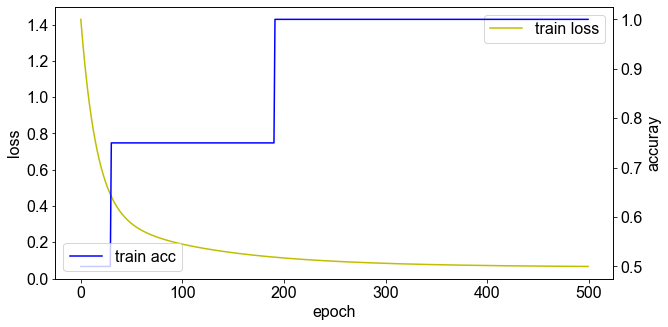

In [6]:
plt.rcParams["font.family"] = 'Arial'
plt.rcParams["font.size"] = 16
plt.rcParams["figure.figsize"] = (10, 5)

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax2 = ax1.twinx()

ax1.plot(hist.history['loss'], 'y', label='train loss')
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')
ax1.legend(bbox_to_anchor=(1, 1))

ax2.plot(hist.history['acc'], 'b', label='train acc')
ax2.set_ylabel('accuray')
ax2.legend(loc='lower left')

plt.show()

### 모델성능 평가

In [7]:
model.evaluate(train_x, train_y)
model.get_weights()

1/1 [==============================] - 1s 659ms/step - loss: 0.0665 - acc: 1.0000


[array([[0.49431452],
        [0.37552658]], dtype=float32),
 array([0.3271933], dtype=float32)]

In [8]:
r00 = model.predict([[0, 0]])
r00

array([[0.3271933]], dtype=float32)

In [9]:
result = "%s OR %s => %s" % (bool(0), bool(0), bool(round(r00[0,0])))
result

'False OR False => False'

### 경우의 수 확인

In [10]:
for i in range(0, 2):
    for j in range(0, 2):
        r = model.predict([[i, j]])
        s = "%s OR %s => %s" % (bool(i), bool(j), bool(round(r[0,0])))
        print(s)

False OR False => False
False OR True => True
True OR False => True
True OR True => True
